# Data Visualization.
# Homework 1: EDA and Visualizations

## 1. Data Cleaning & Pre-Processing

In [1]:
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let us start by reading the dataset, checking its shape, columns, number of observations:

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 1.1 Missing Values and Duplicates

Let us handle the missing values first. Check the missing values in all columns:

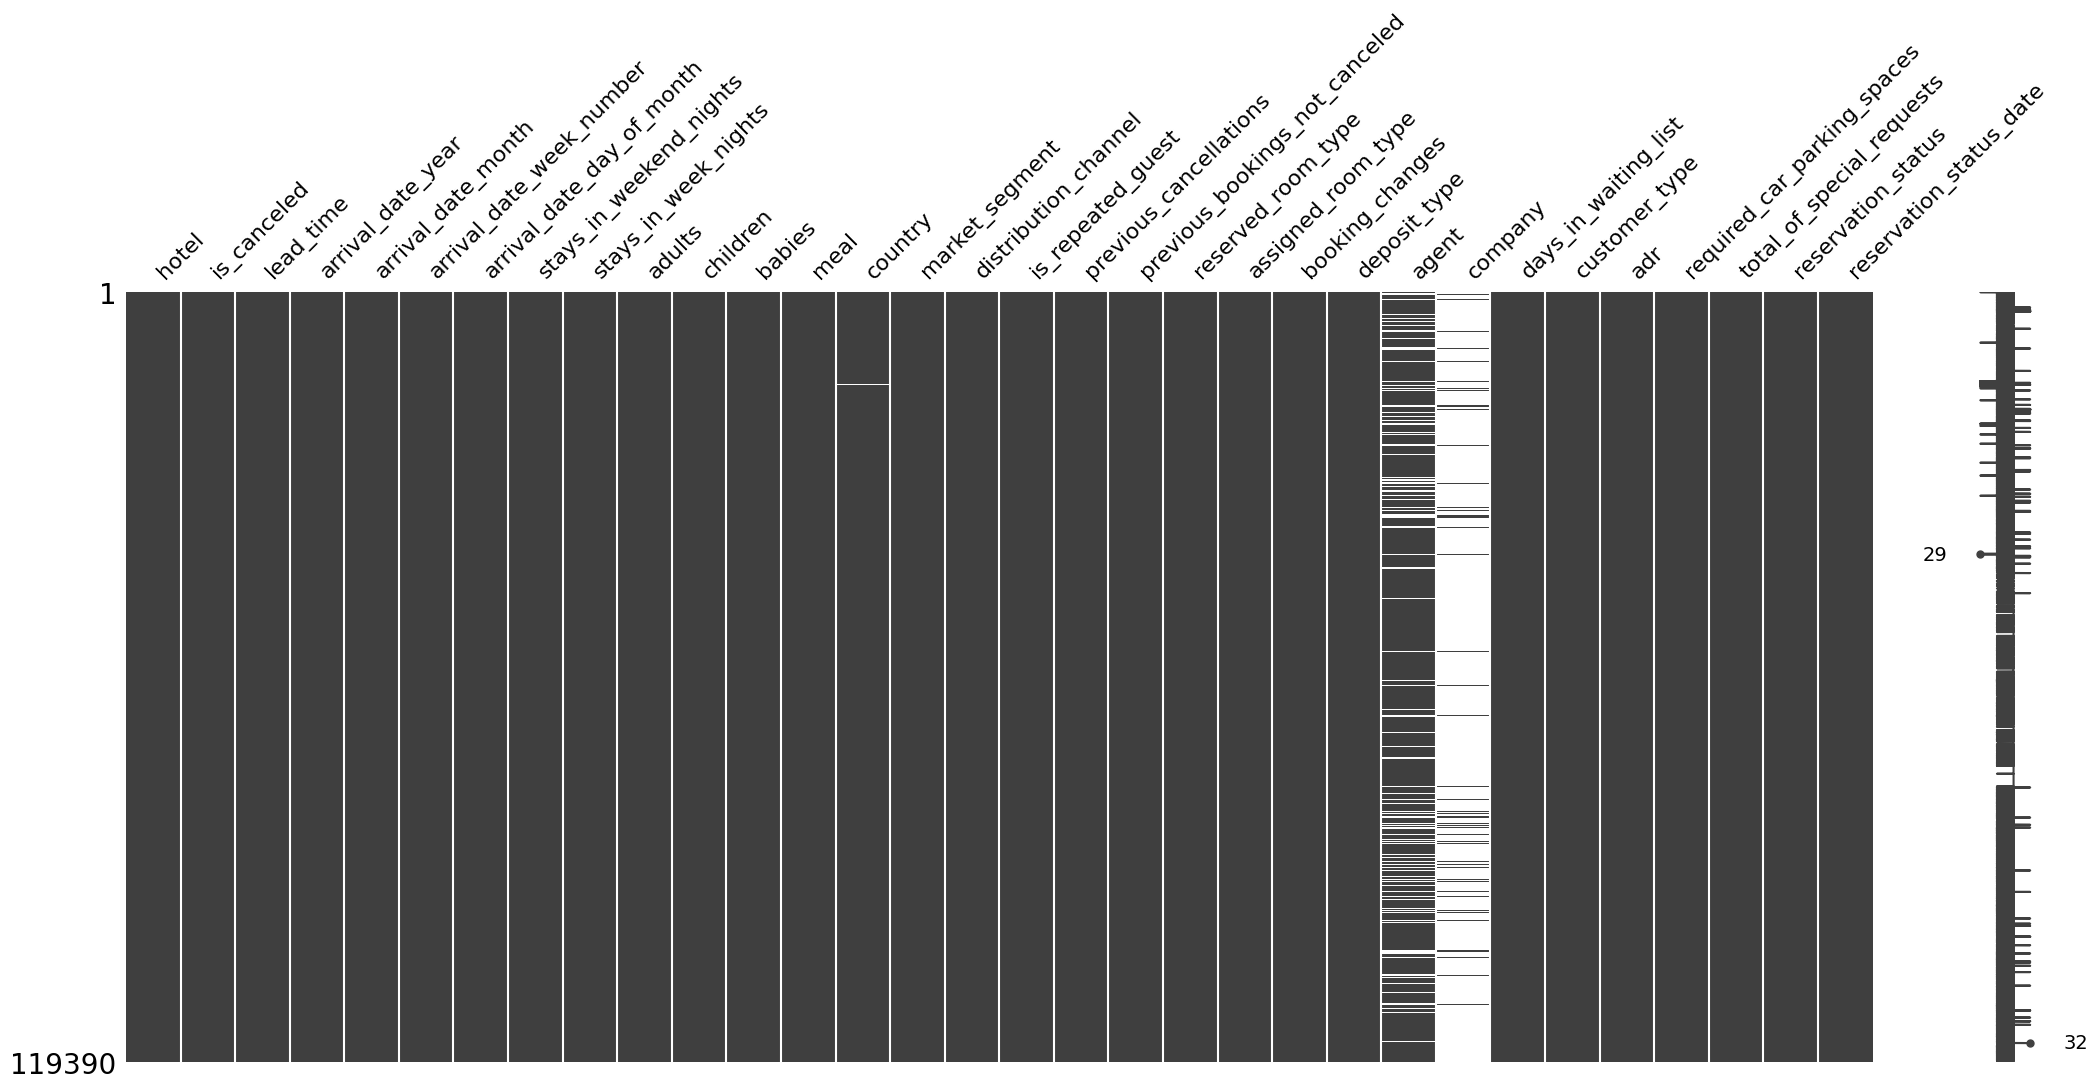

In [3]:
missingno.matrix(df)
plt.show()

There are lots of missing values in the `agent` and `company` columns. Since these columns contain the IDs of the travel agencies and the companies that made the bookings, respectively, we can remove them as we do not have the data frames that are referenced by these columns.

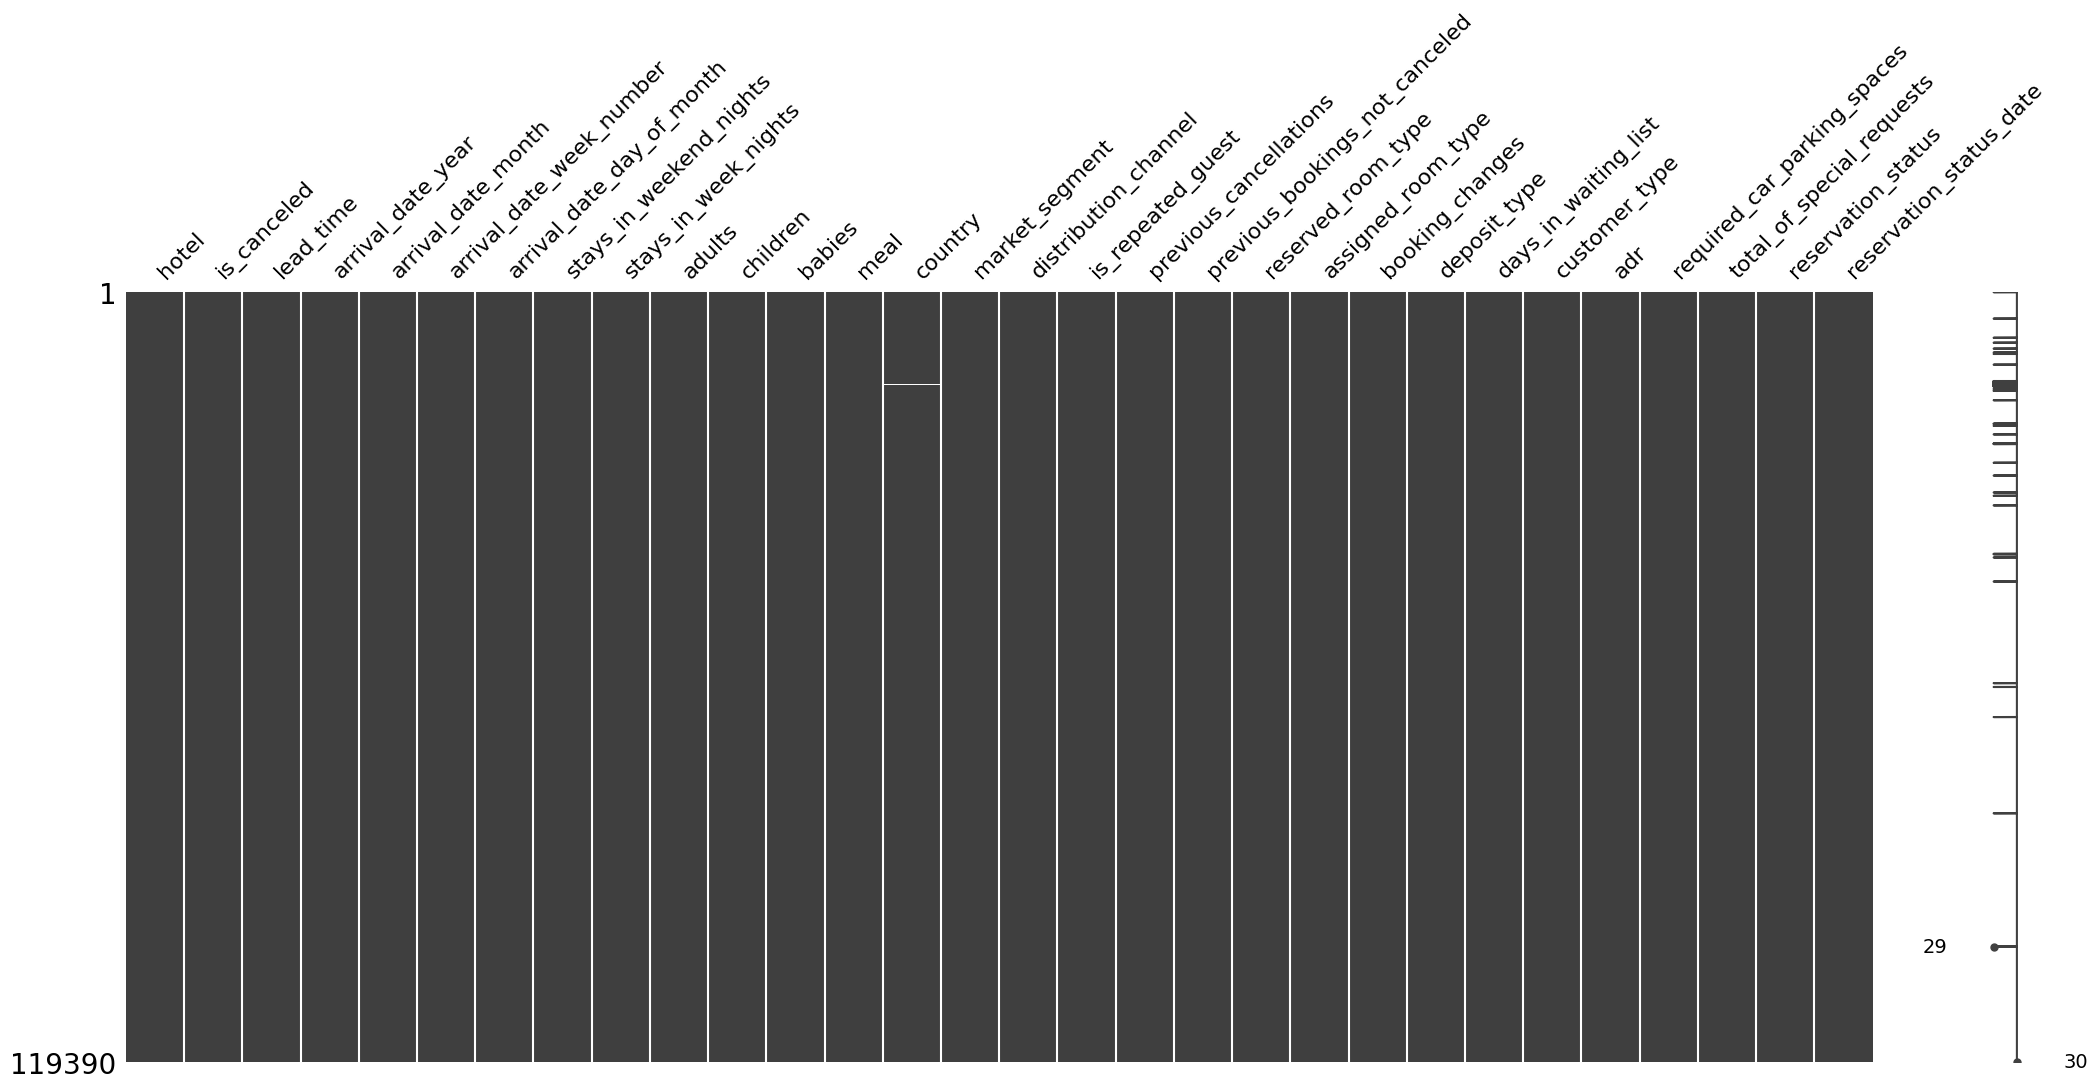

In [4]:
df = df.drop(['agent', 'company'], axis=1)
missingno.matrix(df)
plt.show()

Checking the missing values again, it seems the huge portion of the rows in the data frame contain valid values. Let us check the exact proportion of missing values in each column.

In [5]:
df.isna().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
days_in_wai

Now only two columns contain missing values, which form less than 0.5% of the entire rows. This means we can easily remove these values and deal with the valid values only.

In [6]:
df = df.dropna()
assert df.isna().sum().sum() == 0

In [7]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 1.2 Data Types and Unique Values of Columns

There is no need to check for duplicates since there can easily be two or more identical rows: *e.g. a group of friends can make the exact same reservations.* Instead, we can check the data types of the columns and see if there is a need to make changes here.

In [8]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

The `children` column initially contained `null` values, that is why it has a `float64` type instead of `int64`. In addition, `reservation_status_date` can be of `datetime64` type so we can perform time-related functions on it if needed. Let us fix these two issues.

In [9]:
df['children'] = np.int64(df['children'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

Let us also check the unique values (categories) of the categorical columns to make sure there are no duplicates, typos, etc:

In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('\n' + col)
        print(np.unique(df[col]))


hotel
['City Hotel' 'Resort Hotel']

arrival_date_month
['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']

meal
['BB' 'FB' 'HB' 'SC' 'Undefined']

country
['ABW' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATA' 'ATF' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BOL' 'BRA' 'BRB' 'BWA' 'CAF' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'CN' 'COL'
 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'GAB' 'GBR'
 'GEO' 'GGY' 'GHA' 'GIB' 'GLP' 'GNB' 'GRC' 'GTM' 'GUY' 'HKG' 'HND' 'HRV'
 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JEY'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBY'
 'LCA' 'LIE' 'LKA' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO' 'MDG' 'MDV' 'MEX'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'MYT' 'NAM'
 'NCL' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PA

In [11]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


Now that the data frame is clean, we can proceed with visualizations to get to know the data in more depth.




## 2. Visualizations

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 8)
rcParams['axes.titlesize'] = 20
rcParams['axes.titlepad'] = 25
rcParams['axes.labelsize'] = 15
rcParams['axes.labelpad'] = 8
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['font.size'] = 15

### 2.1 Lead Time Distribution

The lead time is the time between when the booking was made and the date of arrival. Checking the distribution of this column may help identify patterns in how far in advance people typically make reservations.

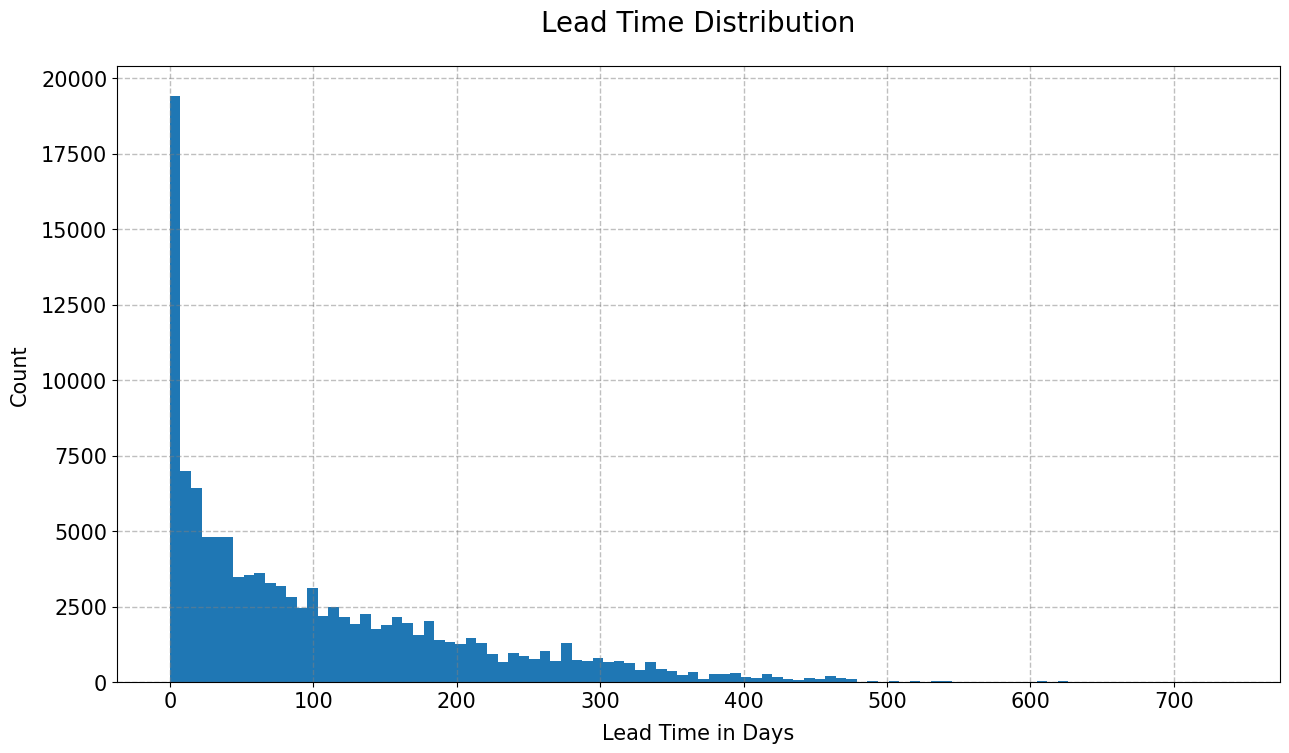

In [13]:
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.hist(df['lead_time'], bins=100)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time in Days')
plt.ylabel('Count')
plt.show()

We can see that people tend to make reservations at most around 2 years in advance. However, most guests make the reservation the day they arrive, and people tend to make the reservations as close to the arrival date as possible. 

### 2.2 Lead Time Distribution by Cancellation Status

Let us compare the lead time of bookings that were canceled versus those that were not canceled in order to identify whether there is a connection between cancellation and lead time or not.

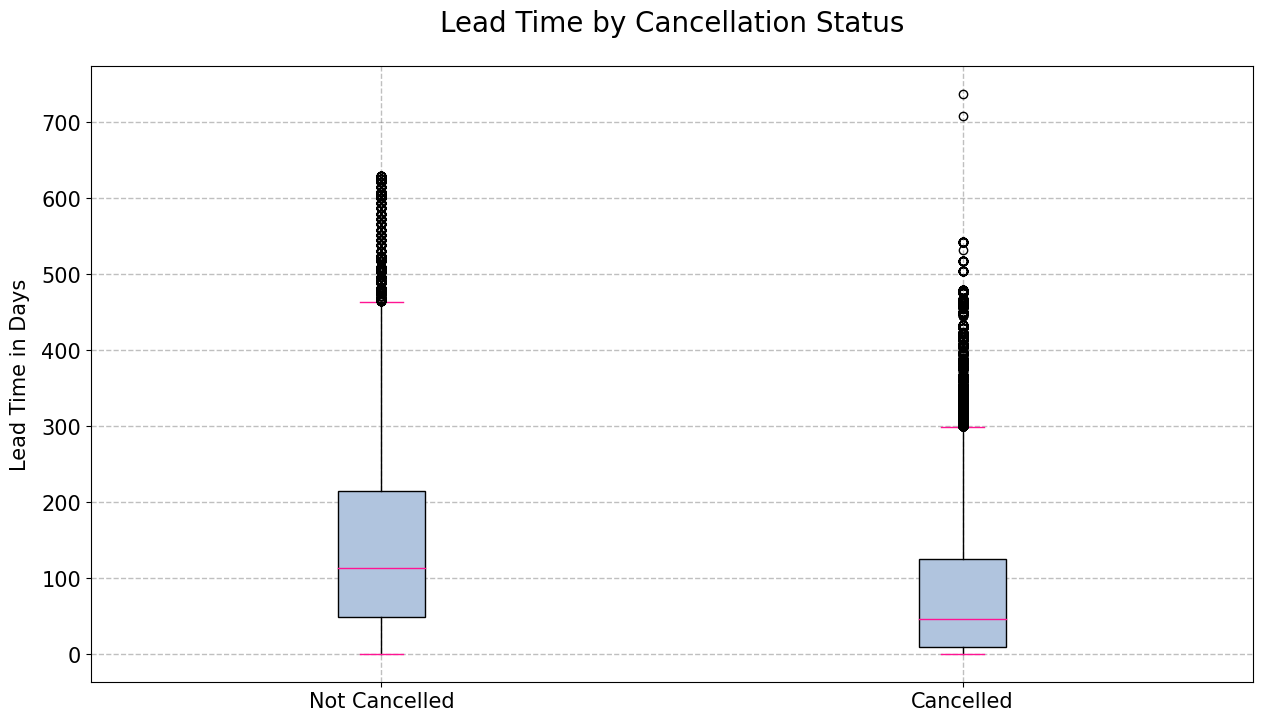

In [14]:
lead_by_canceled = pd.concat([df['lead_time'], df['is_canceled']], axis=1)
lead_by_canceled['is_canceled'] = np.where(lead_by_canceled['is_canceled'] == 0, 'Not Cancelled', 'Cancelled')
cancelled_lead = lead_by_canceled[lead_by_canceled['is_canceled'] == 'Cancelled']['lead_time']
not_cancelled_lead = lead_by_canceled[lead_by_canceled['is_canceled'] == 'Not Cancelled']['lead_time']

fig, ax = plt.subplots()
dataset = [cancelled_lead, not_cancelled_lead]
labels = lead_by_canceled['is_canceled'].unique()
box = ax.boxplot(dataset, labels=labels, patch_artist=True)
plt.setp(box['boxes'], facecolor='lightsteelblue')
plt.setp(box['medians'], color='deeppink')
plt.setp(box['caps'], color='deeppink')
plt.title('Lead Time by Cancellation Status')
plt.ylabel('Lead Time in Days')
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.show()

We can see that the largest portion of reservations that were not cancelled were booked for around 100-200 days in advance. The median is around 100 for this group, so half of the reservations that were not cancelled were made a 100 days in advance or sooner. The box for the other group is positioned lower and has outliers reaching a lead time of 700 days or more, while the median is around 50 days, which means that the lead time of the canceled reservations should have larger variance.

### 2.3 Number of Bookings by Hotel Type 

We may be interested in the difference of the popularity of the two hotels that we have. To do that, we can plot a simple bar chart.

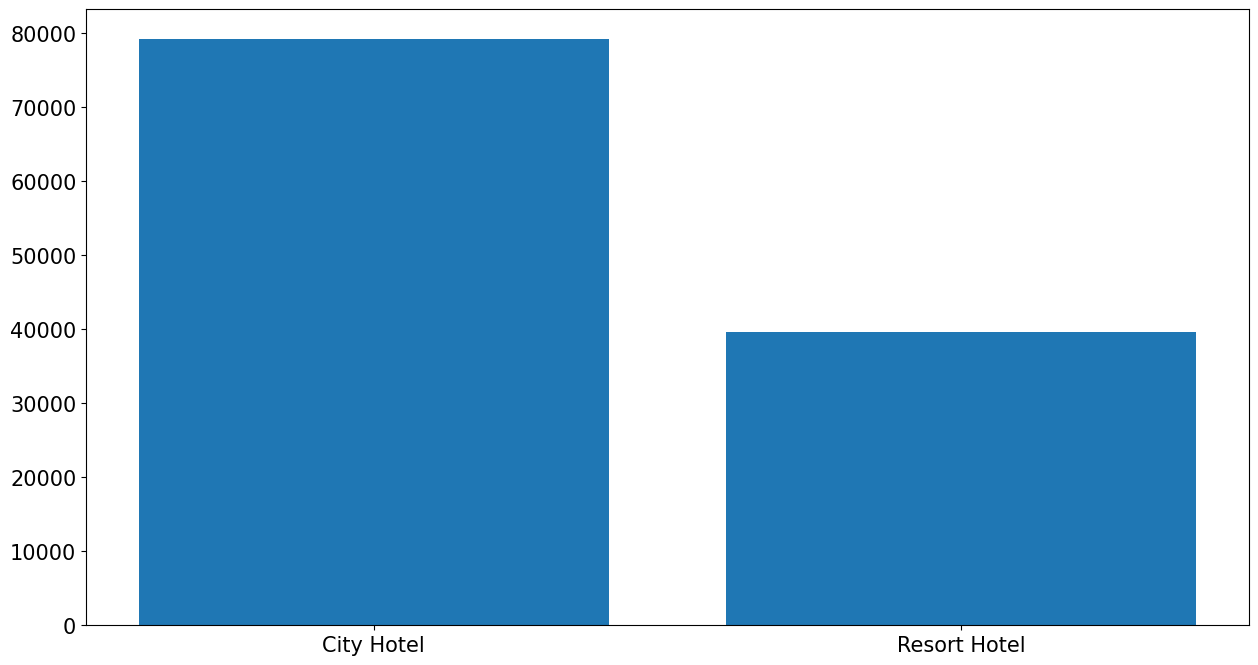

In [15]:
x = np.unique(df['hotel'], return_counts=True)
plt.bar(x[0], x[1])
plt.show()

There are almost twice as many reservations made at City Hotel as in Resort Hotel. However, this does not necessarily mean that the City Hotel is more popular than the Resort Hotel, as we may have this picture simply due to the shortage of rooms in the latter.

### 2.4 Proportion of Cancelled Reservations

We may be interested in the proportion of cancelled bookings. To find out, we can plot a pie chart:

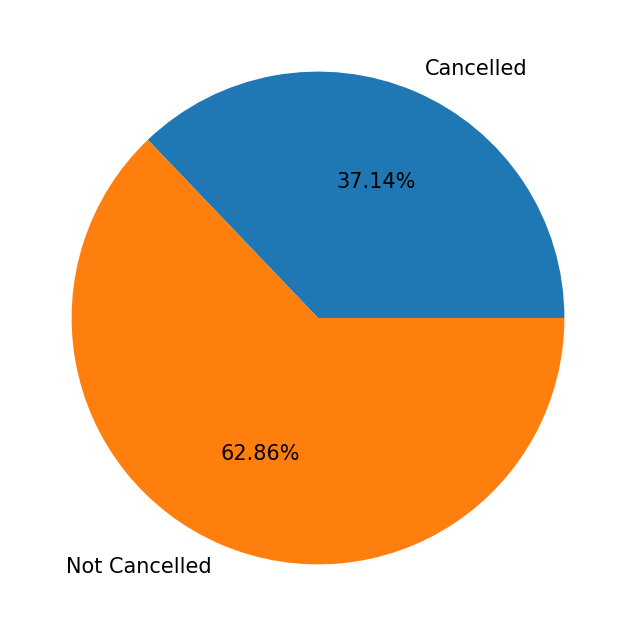

In [16]:
plt.pie(x=[df['is_canceled'].sum(), len(df) - df['is_canceled'].sum()],
        labels = ['Cancelled', 'Not Cancelled'], autopct = "%.2f%%")
plt.show()

There are almost twice as many reservations that are not cancelled as there are cancelled reservations. The number of cancellations must be pretty huge!

### 2.5 Number of Bookings over Time

We can check how the number of bookings changes over time to check whether there is a seasonal pattern or not. To do that, we can create a new column from the columns of the arrival date and plot a line chart.

In [17]:
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
months = {m: str(i+1).zfill(2) for i, m in enumerate(months)}

df['arrival_date_day_of_month_str'] = df['arrival_date_day_of_month'].astype(str)
df['arrival_date_month_str'] = df['arrival_date_month'].map(months)
df['arrival_date_year_str'] = df['arrival_date_year'].astype(str)
df['arrival_date_day_of_month_str'] = df['arrival_date_day_of_month_str'].str.zfill(2)

df['arrival_date'] = df[['arrival_date_year_str',
                         'arrival_date_month_str',
                         'arrival_date_day_of_month_str']].agg('-'.join, axis=1)
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y-%m-%d')

df = df.drop(['arrival_date_day_of_month_str', 'arrival_date_month_str', 'arrival_date_year_str'], axis=1)

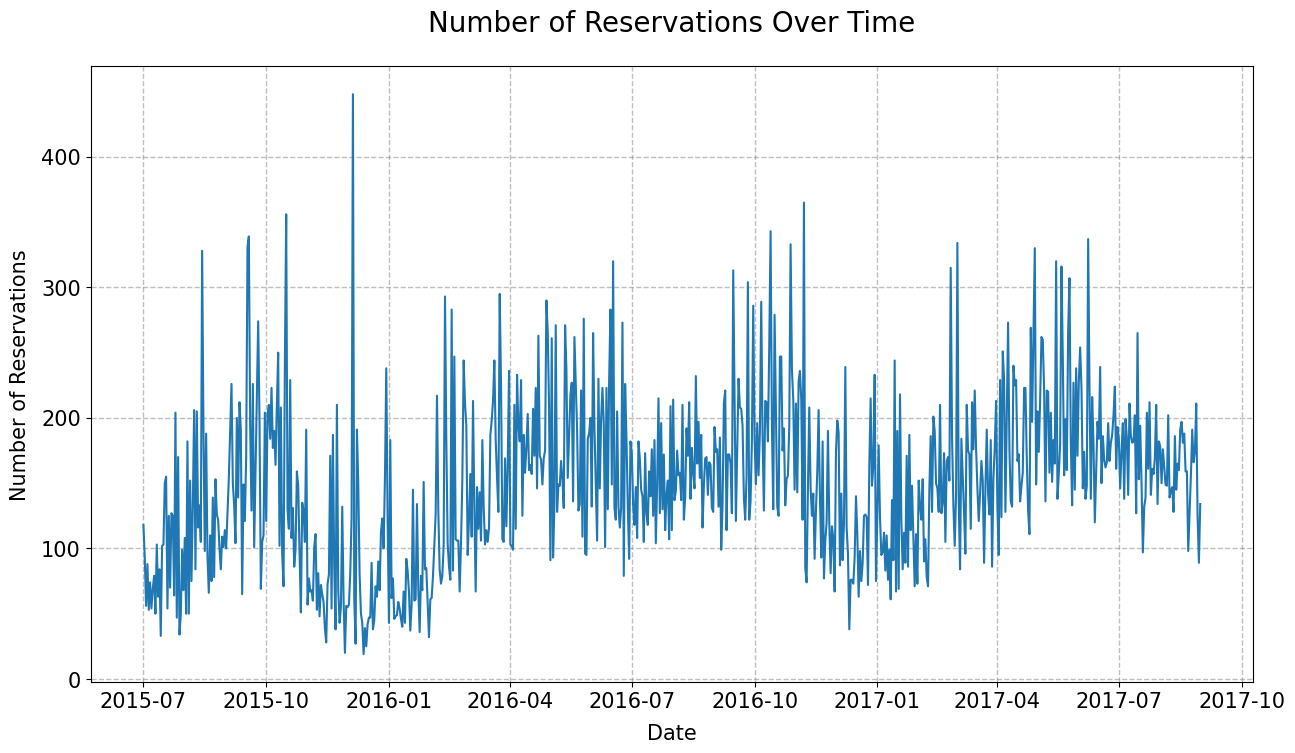

In [18]:
arrival_dates, no_of_arrivals = np.unique(df['arrival_date'], return_counts=True)
assert (arrival_dates != sorted(arrival_dates)).sum() == 0

plt.plot(arrival_dates, no_of_arrivals)
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.title('Number of Reservations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reservations')
plt.show()

It seems that throught a year, the number of bookings peak twice: once in the period of May-June, and another time in mid-autumn. This is an interesting observation as it would be more reasonable that the peaks were in the beginning/end and the middle of the year, i.e. during the peak seasons of tourism.

### 2.6. Number of Reservations by Month

We have noticed slight seasonality in the previous graph. We can investigate it further by taking a look at the number of reservations for each month. We can also dig deeper and split the reservations by the cancellation status.

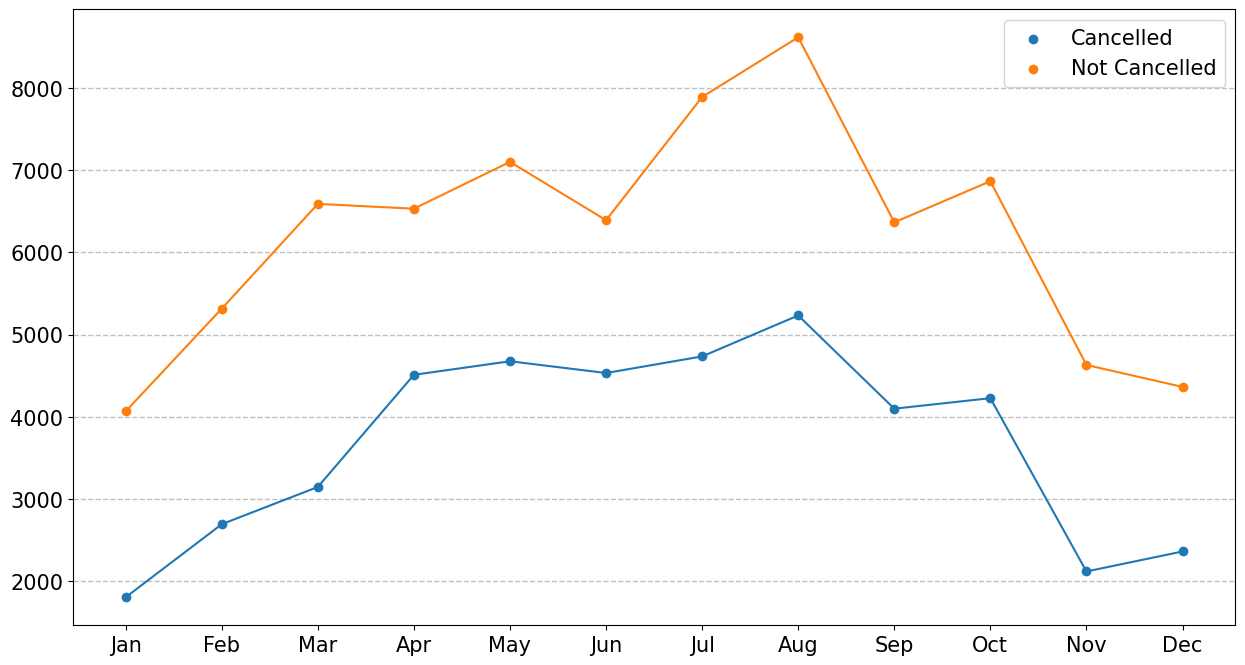

In [19]:
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

ind = np.arange(len(months))
cancelled = np.unique(df[df['is_canceled'] == 1]['arrival_date_month'], return_counts=True)
not_cancelled = np.unique(df[df['is_canceled'] == 0]['arrival_date_month'], return_counts=True)

plt.plot(ind, pd.Series(cancelled[1], index=cancelled[0])[months])
plt.plot(ind, pd.Series(not_cancelled[1], index=not_cancelled[0])[months])
plt.scatter(ind, pd.Series(cancelled[1], index=cancelled[0])[months], label='Cancelled')
plt.scatter(ind, pd.Series(not_cancelled[1], index=not_cancelled[0])[months], label='Not Cancelled')
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5, axis='y')
plt.xticks(ind, [m[:3] for m in months])
plt.legend()
plt.show()

Now we can see three notable peaks: by the end of spring, by the end of summer, and mid-autumn. 

### 2.7 Correlations Between Columns

One important visalization was missing so far. We can check the correlation heat map of the numeric columns of the data to identify which columns are in strong positive or negative linear relationships. To that end, we can plot a heat map, where the bright warm colors denote strong positive correlation, bright cool colors denote strong negative correlation, and colors close to gray denote an uncorrelated pair of features.

In [20]:
numeric_columns = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index
df_num = df[numeric_columns]

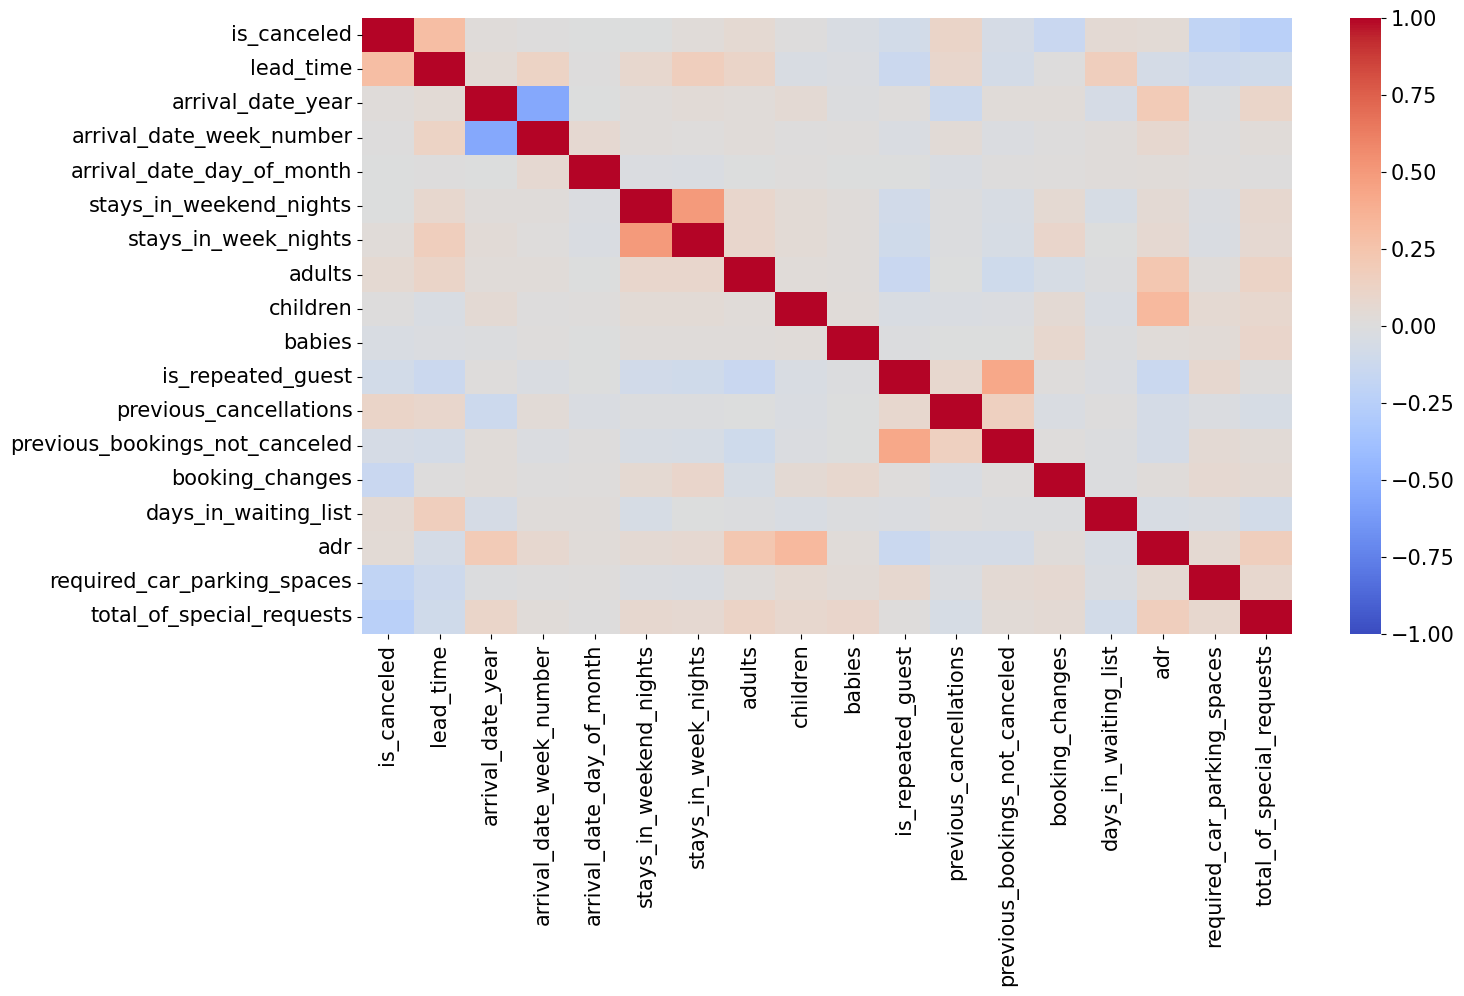

In [21]:
sns.heatmap(df_num.corr(), cmap='coolwarm', vmin=-1., vmax=1.)
plt.show()

There are only a few notable pairs of columns that have high (in absolute value) correlation.

* The `arrival_date_year` and `arrival_date_week_number` are correlated negatively, which means that people tend to arrive sooner for the later years and vice versa.
* Stays in weekend and week nights are correlated positively. This is logical as the longer people stay at the hotels, the higher both features would be. 
* `previous_bookings_not_canceled` and `is_repeated_guest` also have a high correlation, which is also logical as it means that the repeated guests did not cancel previous bookings.
* The lead time and cancellation status are correlated positively, meaning that the longer people have to wait before arrival, the more likely they are to cancel the reservation.
* There is also high correlation between the average daily rate (revenue) and the number of children: people that stay with their children tend to pay more.

### 2.8. Loyalty of Customers

Let us check the proportion of the `is_repeated_guest` column based on the type of the hotel to see which hotel has more loyal customers.

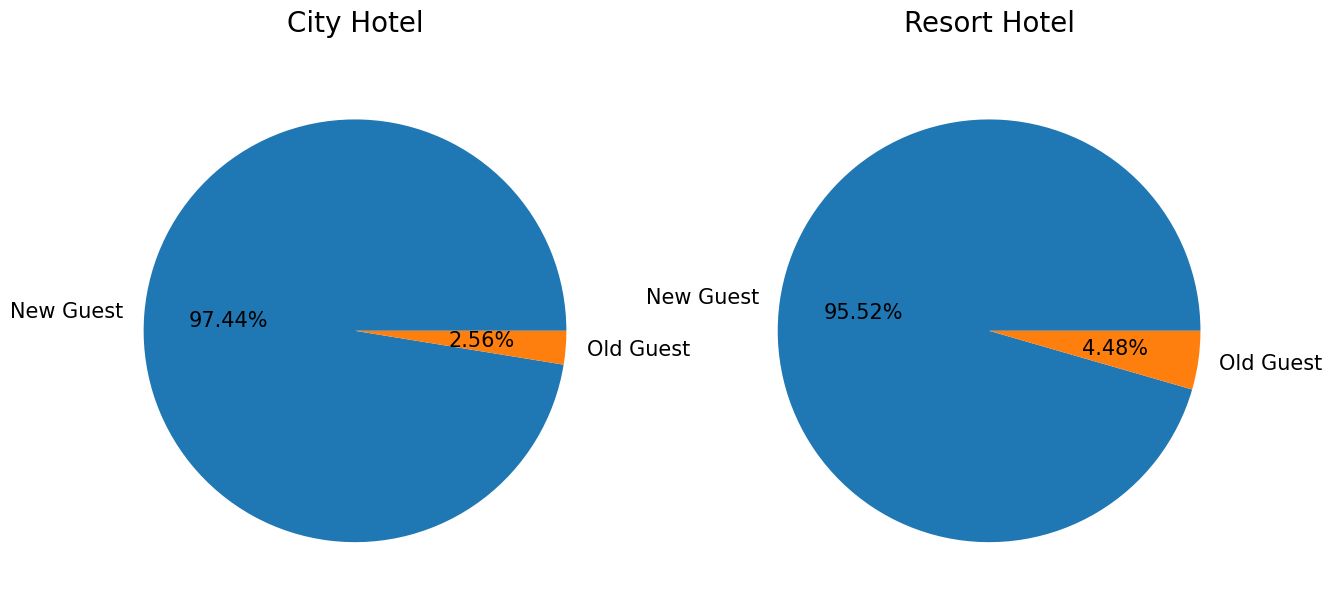

In [22]:
_, (ax1, ax2) = plt.subplots(1, 2)

df1 = df[df['hotel'] == 'City Hotel']
df2 = df[df['hotel'] == 'Resort Hotel']
ax1.pie(x=[len(df1) - df1['is_repeated_guest'].sum(), df1['is_repeated_guest'].sum()],
        labels = ['New Guest', 'Old Guest'], autopct = "%.2f%%")
ax2.pie(x=[len(df2) - df2['is_repeated_guest'].sum(), df2['is_repeated_guest'].sum()],
        labels = ['New Guest', 'Old Guest'], autopct = "%.2f%%")
ax1.set_title('City Hotel')
ax2.set_title('Resort Hotel')
plt.show()

The resort hotel has more loyal customers compared to the city hotel, even though the proportion of the loyal customers is less than 4.5% for both hotels.

### 2.9. Number of Days Stayed

We may be interested in how long the guests tend to stay in each of the hotels.

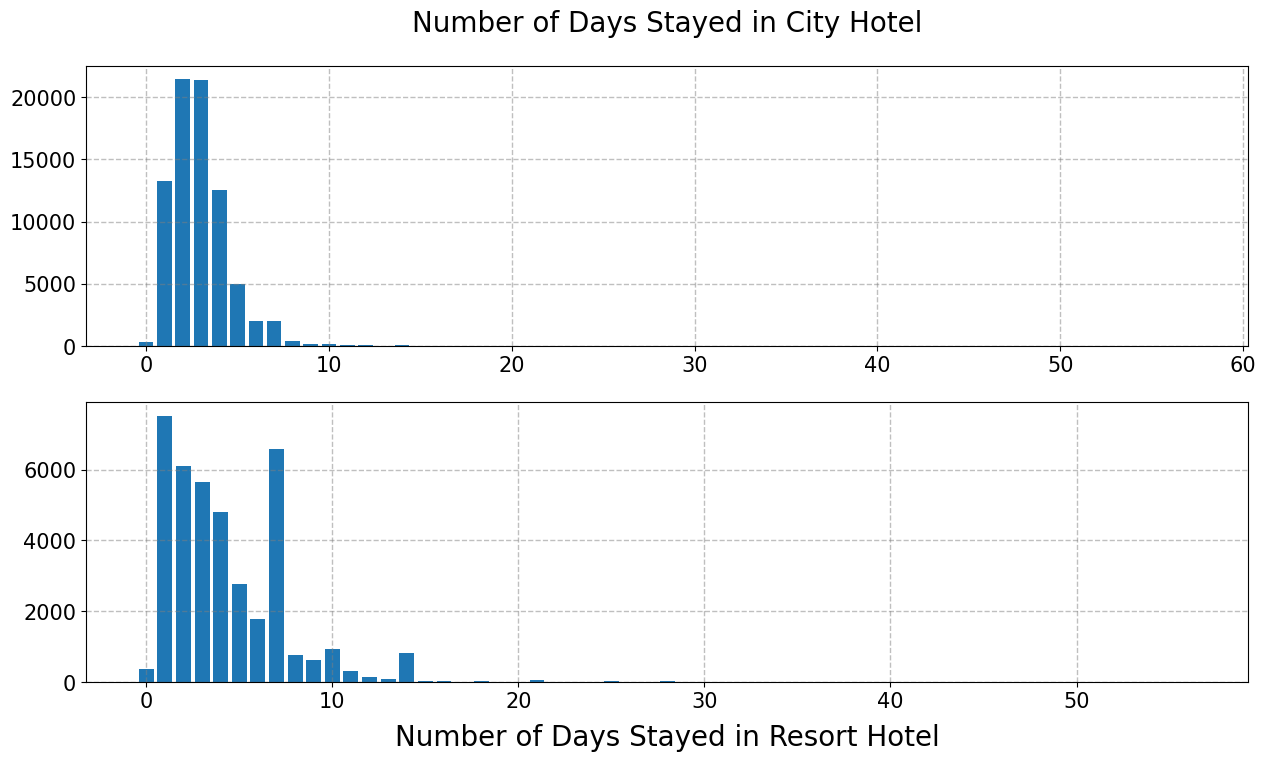

In [23]:
stays1, counts1 = np.unique(df1['stays_in_week_nights'] + df1['stays_in_weekend_nights'], return_counts=True)
stays2, counts2 = np.unique(df2['stays_in_week_nights'] + df2['stays_in_weekend_nights'], return_counts=True)

_, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(stays1, counts1)
ax1.set_title('Number of Days Stayed in City Hotel')
ax1.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.bar(stays2, counts2)
ax2.set_xlabel('Number of Days Stayed in Resort Hotel', fontsize=20)
ax2.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.show()

We can see that even though Resort Hotel has less number of guests, they tend to stay longer in the hotel.

### 2.10 Average Daily Rate over Time

We can take the average of the ADR metric over each day for both hotels to check how the ADR changes over time as well as how ADR changes over time for each hotel.

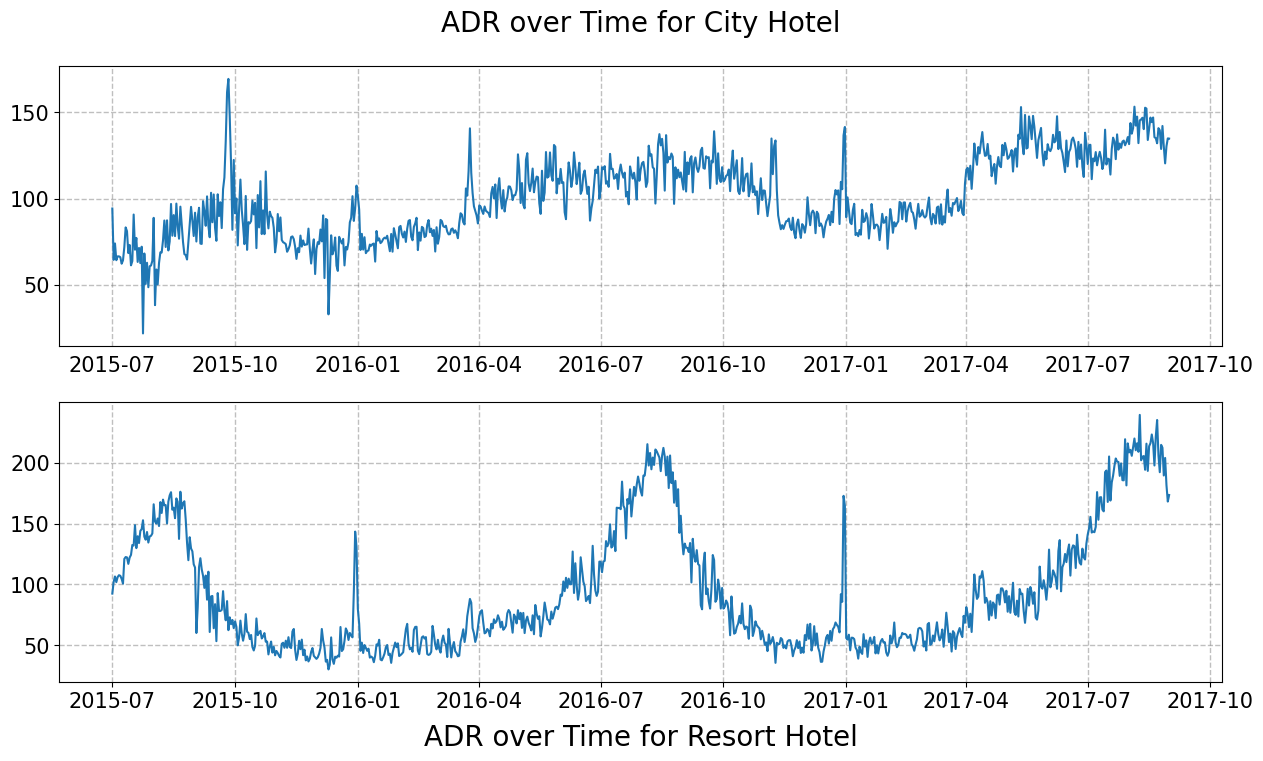

In [24]:
_, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(df1.groupby('arrival_date')['adr'].mean())
ax1.set_title('ADR over Time for City Hotel')
ax1.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.xaxis.set_ticks_position('none') 
ax2.plot(df2.groupby('arrival_date')['adr'].mean())
ax2.set_xlabel('ADR over Time for Resort Hotel', fontsize=20)
ax2.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.show()

We can make a few observations: 
* we notice an upwards trend for both hotels;
* we notice that the mean ADR per day is usually higher for the Resort Hotel;
* there seems to be little to no notable seasonality for the City Hotel ADR;
* on the other hand, the ADR of Resort Hotel has a very notable seasonal component;
* ADR of Resort Hotel tends to peak at the end and the middle of each year. Moreover, during the end of the year ADR peaks in a shorter period of time (right before New Year), while in the middle of the year, the ADR increases from April until mid-August and tends to decrease until the end of the year.

We can do lots of other visualizations and make tons of observations and conclusions as the data has around 30 reasonable columns and ~100K observations, but this much has to be enough to get to know the data from the first sight.